# PyMC3 Example

INSERT INTRO

## Load libraries

In [203]:
%pylab inline
import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import theano.tensor as T
plt.style.use(['seaborn-talk'])
plt.rcParams["figure.figsize"] = (10,8)


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## define colors

In [27]:
c_light ="#DCBCBC"
c_light_highlight ="#C79999"
c_mid ="#B97C7C"
c_mid_highlight ="#A25050"
c_dark ="#8F2727"
c_dark_highlight ="#7C0000"

# Section 3.1

Build a model that generates Poisson counts

## Build a generative model

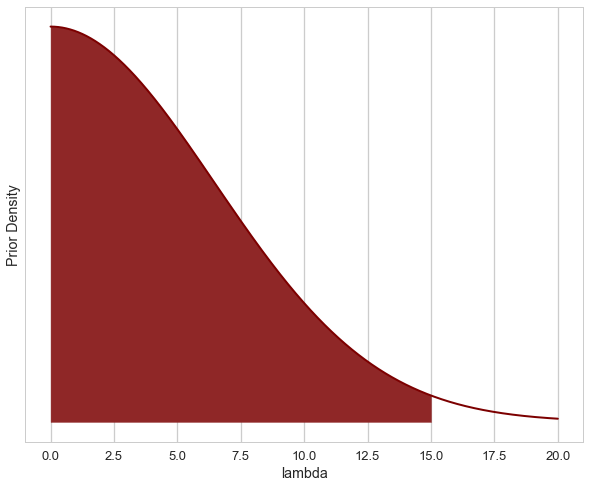

In [28]:
lbda  = np.linspace(0, 20, num=int(20/0.001))

plt.plot(lbda, stats.norm(loc=0,scale=6.44787).pdf(lbda), c=c_dark_highlight, lw=2)
plt.xlabel("lambda"); plt.ylabel("Prior Density"); plt.yticks([]);


lbda99 = np.linspace(0, 15, num=int(15/0.001))



plt.fill_between(lbda99,0.,y2=stats.norm(loc=0,scale=6.44787).pdf(lbda99),color=c_dark)

In [229]:
#NOT WORKING
generative_model = pm.Model()
N = 1000
R = 1000
with generative_model:
    lbda = pm.HalfNormal("lbda",sd=6.44787)
    
    y = pm.Poisson("y",mu=lbda,observed=None,shape=(1,N))

In [230]:
with generative_model:
    trace = pm.sample(R,init='map')#,step=pm.Metropolis(),init='map')
    


Assigned NUTS to lbda_log_
Assigned Metropolis to y
100%|██████████| 1000/1000 [00:01<00:00, 718.82it/s]


In [233]:
trace['y'].shape

(1000, 1, 1000)

In [234]:
simu_lbdas = np.squeeze(trace['lbda'])
simu_ys = np.squeeze(trace['y'])

In [235]:
np.histogram(trace['y'][0,:], bins=bins)

(array([   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]))

In [236]:
np.all(trace['y']==5.)

False

(array([6.20000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.99938e+05]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <a list of 10 Patch objects>)

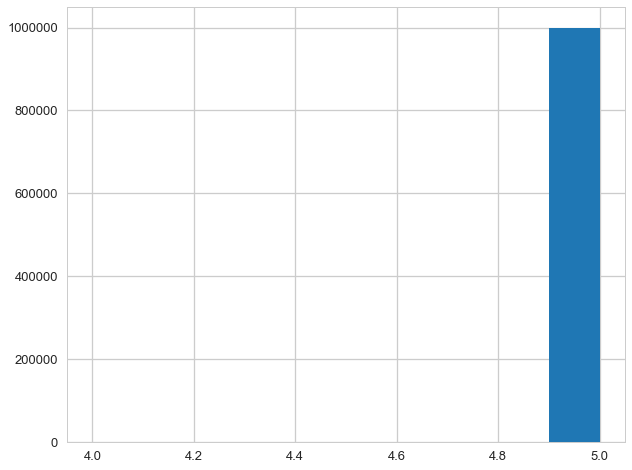

In [237]:
plt.hist(trace['y'].flatten())

(array([  2.,   2.,  34.,  80., 215., 313., 235.,  79.,  28.,  12.]),
 array([4.72147368, 4.77235981, 4.82324595, 4.87413209, 4.92501823,
        4.97590437, 5.02679051, 5.07767665, 5.12856279, 5.17944892,
        5.23033506]),
 <a list of 10 Patch objects>)

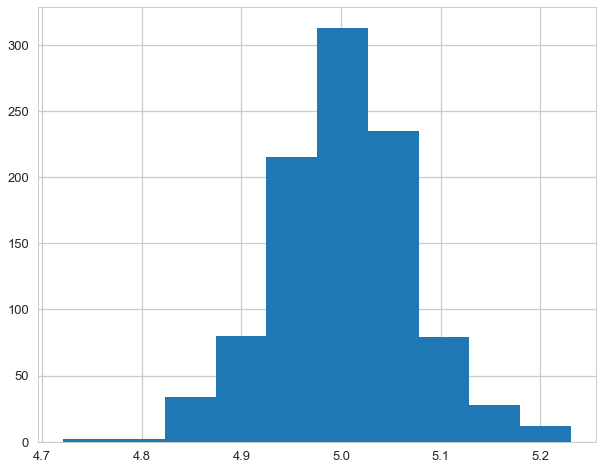

In [238]:
plt.hist(trace['lbda'].flatten())

In [224]:
#WORKING BUT WRONG MODEL
generative_model = pm.Model()
with generative_model:
    lbda = pm.HalfNormal("lbda",sd=6.44787)
    y = pm.Poisson("y",mu=lbda)

Assigned NUTS to alpha_log_
Assigned Metropolis to n
Assigned Metropolis to x
100%|██████████| 10000/10000 [00:04<00:00, 2011.71it/s]


# Section 3.2

Matt to do

# Section 3.3

Mike to do

# Section 3.4

Matt to do